In [495]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import pylab as plot


In [429]:
# US Consumption of Conventional Hydroelectric Power Energy by All Sectors, Annual
hydroelectric_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVTCBUS.A"

In [430]:
print(requests.get(hydroelectric_url))

<Response [200]>


In [431]:
response = requests.get(hydroelectric_url).json()

In [432]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [433]:
# Create lists to determine x and y axis for graphs
years = []
hydroelectric_consumption = []

# Loop through Hydroelectric data API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    hydroelectric_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
hydroelectric = hydroelectric_consumption[::-1]

In [434]:
# Loop through to calculate the annual percent change
i = 0
percent_change_hydroelectric = []
for x in hydroelectric:
    if(i == 0):
        percent_change_hydroelectric.append(0)
    else:
        percent_change_hydroelectric.append( (x - hydroelectric[i-1])/ hydroelectric[i-1] * 100)
    i += 1

In [435]:
# Determine year to year percent change
hydroelectric_consumption_btu_df = pd.DataFrame({
    'Year': years,
    'Hydroelectric (Quads)': hydroelectric_consumption,
    '% Change': percent_change_hydroelectric
})
hydroelectric_consumption_btu_df.head()

,Year,Hydroelectric (Quads),% Change
0,1990,2.601386,0.000000
1,1991,2.461102,-0.999451
2,1992,2.675358,-13.213353
3,1993,2.766969,10.475006
4,1994,2.472442,-7.198601


In [436]:
#  Export file as a CSV, without the Pandas index, but with the header
hydroelectric_consumption_btu_df.to_csv("resources/HydroelectricConsumption.csv", index=False, header=True)

In [437]:
# percent_change_hydroelectric.max()

In [438]:
# hydroelectric_consumption_btu_df.min()

In [439]:
# Calculate the average annual percent change for the last 30 years
hydroelectric_consumption_btu_df.mean()

Year                     6.419997e+121
Hydroelectric (Quads)     2.783022e+00
% Change                  3.346435e-02
dtype: float64

In [440]:
# Find lowest and highest consumption levels for hydroelectric consumption
min_hydroelectric_consumption_value = hydroelectric_consumption_btu_df["Hydroelectric (Quads)"].min()
min_hydroelectric_consumption_year = int(hydroelectric_consumption_btu_df[hydroelectric_consumption_btu_df["Hydroelectric (Quads)"]==min_hydroelectric_consumption_value].Year)
max_hydroelectric_consumption_value = hydroelectric_consumption_btu_df["Hydroelectric (Quads)"].max()
max_hydroelectric_consumption_year = int(hydroelectric_consumption_btu_df[hydroelectric_consumption_btu_df["Hydroelectric (Quads)"]==max_hydroelectric_consumption_value].Year)

print(f"Hydroelectric energy was at its lowest consumption level in the US in {int(min_hydroelectric_consumption_year)} with {min_hydroelectric_consumption_value} quadrillion btu.")
print(f"Hydroelectric energy was at its highest consumption level in the US in  {int(max_hydroelectric_consumption_year)} with {max_hydroelectric_consumption_value} quadrillion btu.")

# Find minimum and maximum annual percent change for hydroelectric consumption
max_hydroelectric_consumption_delta= hydroelectric_consumption_btu_df["% Change"].max()
max_hydroelectric_consumption_year= int(hydroelectric_consumption_btu_df[hydroelectric_consumption_btu_df["% Change"]==max_hydroelectric_consumption_delta].Year)
min_hydroelectric_consumption_delta = hydroelectric_consumption_btu_df["% Change"].min()
min_hydroelectric_consumption_year = int(hydroelectric_consumption_btu_df[hydroelectric_consumption_btu_df["% Change"]==min_hydroelectric_consumption_delta].Year)

print(f"The largest percent increase in US hydroelectric energy consumption was {max_hydroelectric_consumption_delta}% in {max_hydroelectric_consumption_year}.")
print(f"The largest percent decrease in US hyrdoelectric energy consumption was {min_hydroelectric_consumption_delta}% in {min_hydroelectric_consumption_year}.")

# find the total hydroelectric consumption over the last thirty years
hydroelectric_total_consumption = hydroelectric_consumption_btu_df["Hydroelectric (Quads)"].sum()
print(f"By 2020, The US will have consumed approximately {hydroelectric_total_consumption} quadrillion btus of hydroelectric energy since 1990.")

Hydroelectric energy was at its lowest consumption level in the US in 2009 with 2.241858478 quadrillion btu.
Hydroelectric energy was at its highest consumption level in the US in  2013 with 3.640457501 quadrillion btu.
The largest percent increase in US hydroelectric energy consumption was 22.22974006592279% in 2011.
The largest percent decrease in US hyrdoelectric energy consumption was -20.2502341505065% in 2001.
By 2020, The US will have consumed approximately 86.27367599799997 quadrillion btus of hydroelectric energy since 1990.


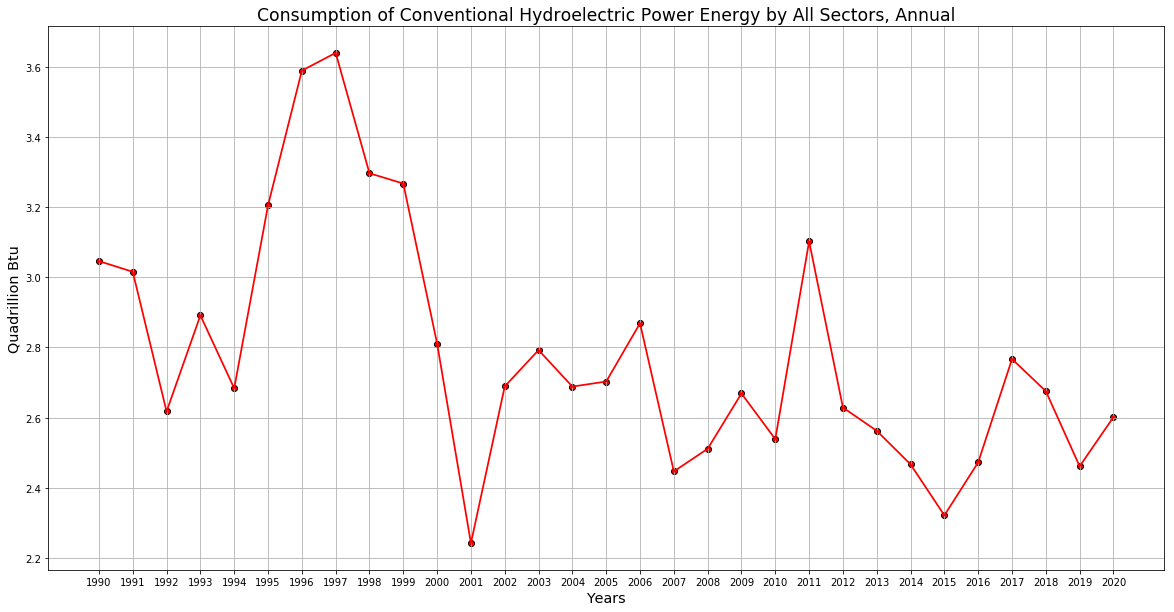

In [441]:
# US Consumption of Conventional Hydroelectric Power Energy by All Sectors, Annual
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, hydroelectric, color="red", edgecolors="black")
plt.plot(years, hydroelectric, linewidth=1.75, color="red")
plt.title("Consumption of Conventional Hydroelectric Power Energy by All Sectors, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/Hydroelectric Consumption.png")

# display the figure
plt.show()

In [442]:
# US Consumption of Geothermal Energy by All Sectors, Annual
geothermal_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GETCBUS.A"

In [443]:
print(requests.get(geothermal_url))

<Response [200]>


In [444]:
response = requests.get(geothermal_url).json()

In [445]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [446]:
# US Consumption of Geothermal Energy by All Sectors, Annual
# Create lists to determine x and y axis for graphs
years = []
geothermal_consumption = []

# Loop through Geothermal API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    geothermal_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
geothermal = geothermal_consumption[::-1]

In [447]:
# Loop through to calculate the annual percent change
i = 0
percent_change_geothermal = []
for x in geothermal:
    if(i == 0):
        percent_change_geothermal.append(0)
    else:
        percent_change_geothermal.append( (x - geothermal[i-1])/ geothermal[i-1] * 100)
    i += 1

In [448]:
# Determine year to year percent change
geothermal_consumption_btu_df = pd.DataFrame({
    'Year': years,
    'Geothermal (Quads)': geothermal_consumption,
    '% Change': percent_change_geothermal
})
geothermal_consumption_btu_df.head()

,Year,Geothermal (Quads),% Change
0,1990,0.231220,0.000000
1,1991,0.229400,4.028482
2,1992,0.218939,0.604074
3,1993,0.210233,3.902945
4,1994,0.209604,-6.575843


In [449]:
#  Export file as a CSV, without the Pandas index, but with the header
geothermal_consumption_btu_df.to_csv("resources/GeothermalConsumption.csv", index=False, header=True)

In [450]:
geothermal_consumption_btu_df.max()

Year                  2020.000000
Geothermal (Quads)       0.231220
% Change                 7.432755
dtype: float64

In [451]:
# Calculate the average annual percent change for the last 20 years
geothermal_consumption_btu_df.mean()

Year                  6.419997e+121
Geothermal (Quads)     1.893928e-01
% Change               1.049313e+00
dtype: float64

In [452]:
# Find minimum and maximum emissions for natural gas
min_geothermal_consumption_value = geothermal_consumption_btu_df["Geothermal (Quads)"].min()
min_geothermal_consumption_year = int(geothermal_consumption_btu_df[geothermal_consumption_btu_df["Geothermal (Quads)"]==min_geothermal_consumption_value].Year)
max_geothermal_consumption_value = geothermal_consumption_btu_df["Geothermal (Quads)"].max()
max_geothermal_consumption_year = int(geothermal_consumption_btu_df[geothermal_consumption_btu_df["Geothermal (Quads)"]==max_geothermal_consumption_value].Year)

print(f"Geothermal energy was at its lowest consumption level in the US in {int(min_geothermal_consumption_year)} with {min_geothermal_consumption_value} quadrillion btu.")
print(f"Geothermal energy was at its highest consumption level in the US in  {int(max_geothermal_consumption_year)} with {max_geothermal_consumption_value} quadrillion btu.")

# Find minimum and maximum annual percent change for US coal consumption
max_geothermal_consumption_delta= geothermal_consumption_btu_df["% Change"].max()
max_geothermal_consumption_year= int(geothermal_consumption_btu_df[geothermal_consumption_btu_df["% Change"]==max_geothermal_consumption_delta].Year)
min_geothermal_consumption_delta = geothermal_consumption_btu_df["% Change"].min()
min_geothermal_consumption_year = int(geothermal_consumption_btu_df[geothermal_consumption_btu_df["% Change"]==min_geothermal_consumption_delta].Year)

print(f"The largest percent increase in US geothermal energy consumption was {max_geothermal_consumption_delta}% in {max_geothermal_consumption_year}.")
print(f"The largest percent decrease in US geothermal energy consumption was {min_geothermal_consumption_delta}% in {min_geothermal_consumption_year}.")

# find the total geothermal consumption over the last thirty years
geothermal_total_consumption = geothermal_consumption_btu_df["Geothermal (Quads)"].sum()
print(f"By 2020, The US will have consumed approximately {geothermal_total_consumption} quadrillion btus of geothermal energy since 1990.")

Geothermal energy was at its lowest consumption level in the US in 2015 with 0.152056598 quadrillion btu.
Geothermal energy was at its highest consumption level in the US in  1990 with 0.2312196 quadrillion btu.
The largest percent increase in US geothermal energy consumption was 7.432755400722573% in 1996.
The largest percent decrease in US geothermal energy consumption was -12.340985997343907% in 1995.
By 2020, The US will have consumed approximately 5.871177333000001 quadrillion btus of geothermal energy since 1990.


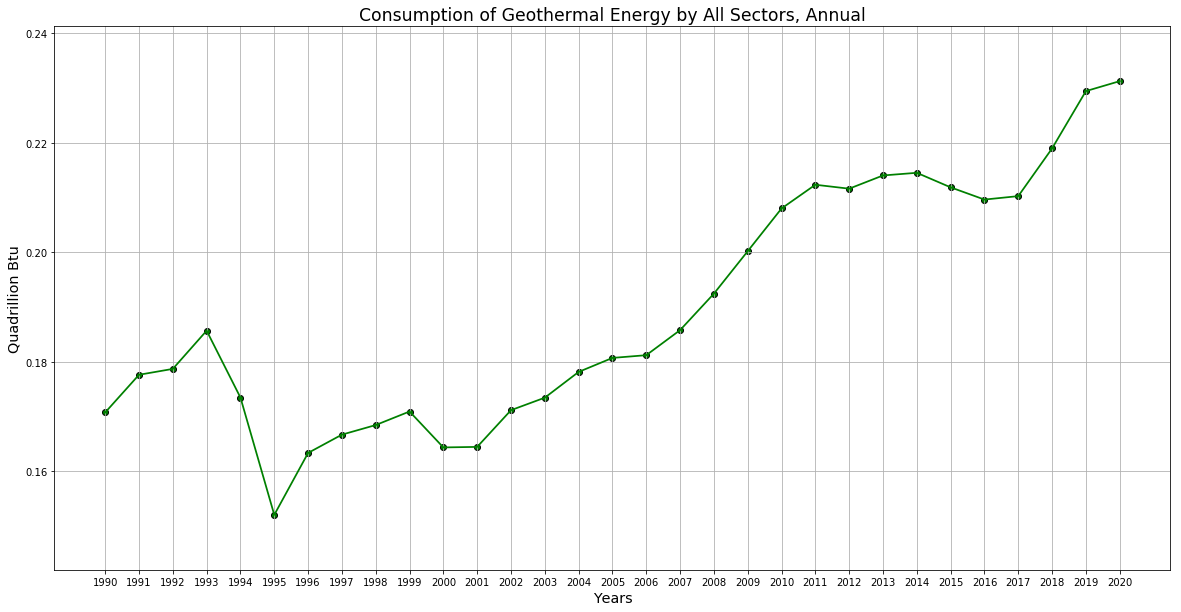

In [453]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(years, geothermal, color="green", edgecolors="black")
plt.plot(years, geothermal, color="green", linewidth=1.75)
plt.title("Consumption of Geothermal Energy by All Sectors, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/Geothermal Consumption.png")

# display the figure
plt.show()

In [454]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
solar_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOTCBUS.A"

In [455]:
print(requests.get(solar_url))

<Response [200]>


In [456]:
response = requests.get(solar_url).json()

In [457]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [458]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
# Create lists to determine x and y axis for graphs
years = []
solar_consumption = []

# Loop through Solar API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    solar_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
solar = solar_consumption[::-1]

In [459]:
# Loop through to calculate the annual percent change
i = 0
percent_change_solar = []
for x in solar:
    if(i == 0):
        percent_change_solar.append(0)
    else:
        percent_change_solar.append( (x - solar[i-1])/ solar[i-1] * 100)
    i += 1

In [460]:
# Determine year to year percent change
solar_consumption_btu_df = pd.DataFrame({
    'Year': years,
    'Solar (Quads)': solar_consumption,
    '% Change': percent_change_solar
})
solar_consumption_btu_df.head()

,Year,Solar (Quads),% Change
0,1990,1.273658,0.000000
1,1991,1.077747,4.937309
2,1992,0.955601,2.121059
3,1993,0.774466,3.743426
4,1994,0.568665,3.090801


In [461]:
#  Export file as a CSV, without the Pandas index, but with the header
solar_consumption_btu_df.to_csv("resources/SolarConsumption.csv", index=False, header=True)

In [462]:
solar_consumption_btu_df.max()

Year             2020.000000
Solar (Quads)       1.273658
% Change           50.068796
dtype: float64

In [463]:
# Calculate the average annual percent change for the last 20 years
solar_consumption_btu_df.mean()

Year             6.419997e+121
Solar (Quads)     2.367174e-01
% Change          1.136564e+01
dtype: float64

In [464]:
# Find minimum and maximum consumption levels for solar energy
min_solar_consumption_value = solar_consumption_btu_df["Solar (Quads)"].min()
min_solar_consumption_year = int(solar_consumption_btu_df[solar_consumption_btu_df["Solar (Quads)"]==min_solar_consumption_value].Year)
max_solar_consumption_value = solar_consumption_btu_df["Solar (Quads)"].max()
max_solar_consumption_year = int(solar_consumption_btu_df[solar_consumption_btu_df["Solar (Quads)"]==max_solar_consumption_value].Year)

print(f"Solar energy will be at its lowest consumption level in the US in {int(min_solar_consumption_year)} with {min_solar_consumption_value} quadrillion btu.")
print(f"Solar energy was at its highest consumption level in the US in  {int(max_solar_consumption_year)} with {max_solar_consumption_value} quadrillion btu.")

# Find minimum and maximum annual percent change for US solar energy consumption
max_solar_consumption_delta= solar_consumption_btu_df["% Change"].max()
max_solar_consumption_year= int(solar_consumption_btu_df[solar_consumption_btu_df["% Change"]==max_solar_consumption_delta].Year)
min_solar_consumption_delta = solar_consumption_btu_df["% Change"].min()
min_solar_consumption_year = int(solar_consumption_btu_df[solar_consumption_btu_df["% Change"]==min_solar_consumption_delta].Year)

print(f"The largest percent increase in US geothermal energy consumption was {max_solar_consumption_delta}% in {max_solar_consumption_year}.")
print(f"The largest percent decrease in US geothermal energy consumption was {min_solar_consumption_delta}% in {min_solar_consumption_year}.")

# find the solar geothermal consumption over the last thirty years
solar_total_consumption = solar_consumption_btu_df["Solar (Quads)"].sum()
print(f"By 2020, The US will have consumed approximately {solar_total_consumption} quadrillion btus of solar energy since 1990.")

Solar energy will be at its lowest consumption level in the US in 2020 with 0.059419783 quadrillion btu.
Solar energy was at its highest consumption level in the US in  1990 with 1.2736578 quadrillion btu.
The largest percent increase in US geothermal energy consumption was 50.06879602944431% in 2014.
The largest percent decrease in US geothermal energy consumption was -3.4587188554373554% in 2000.
By 2020, The US will have consumed approximately 7.338240255000001 quadrillion btus of solar energy since 1990.


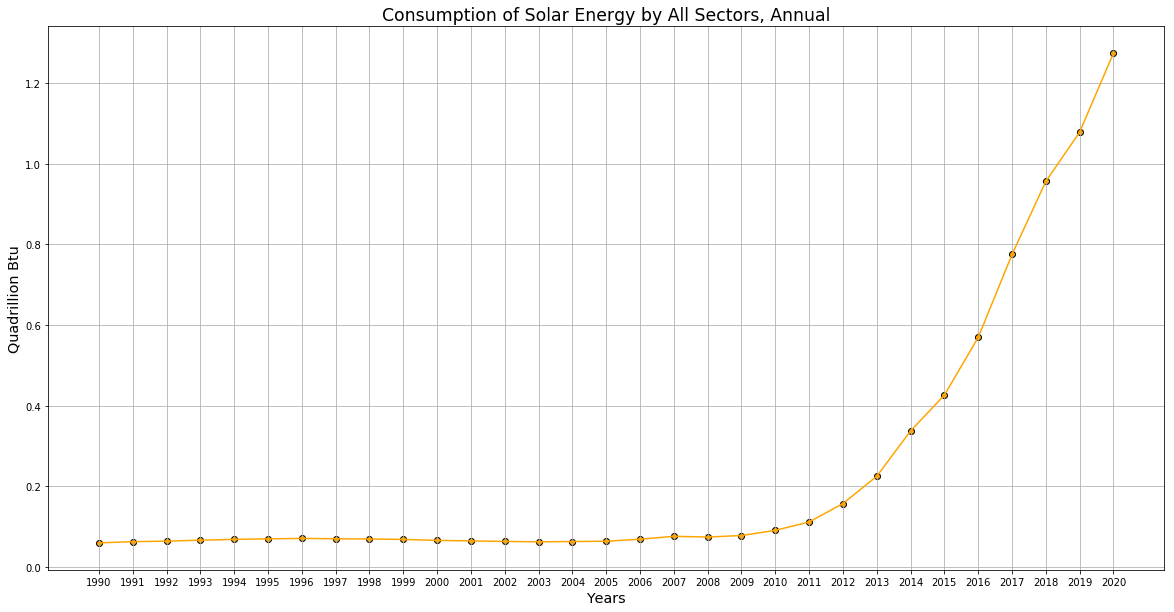

In [465]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
plt.figure(figsize=(20,10))
# # Create a visual for the data
plt.scatter(years, solar, color="orange", edgecolors="black")
plt.plot(years, solar, color="orange")
plt.title("Consumption of Solar Energy by All Sectors, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/Solar Consumption.png")

# display the figure
plt.show()

In [466]:
# Electric Power Sector Large-Scale Wind Net Summer Capacity, Annual
wind_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNTCBUS.A"

In [467]:
print(requests.get(wind_url))

<Response [200]>


In [468]:
response = requests.get(wind_url).json()

In [469]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [470]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
# Create lists to determine x and y axis for graphs
years = []
wind_consumption = []

# Loop through Solar API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    wind_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
wind = wind_consumption[::-1]

In [471]:
# Determine annual percent change
i = 0
percent_change_wind = []
for x in wind:
    if (i == 0):
        percent_change_wind.append(0)
    else:
        percent_change_wind.append( (x - wind[i-1])/ wind[i-1] * 100)
    i += 1

In [472]:
# Determine year to year percent change
wind_consumption_btu_df = pd.DataFrame({
    'Year': years,
    'Wind (Quads)': wind_consumption,
    '% Change': percent_change_wind
})
wind_consumption_btu_df.head()

,Year,Wind (Quads),% Change
0,1990,3.253554,0.000000
1,1991,2.891694,6.167845
2,1992,2.546014,-3.030776
3,1993,2.345611,3.764914
4,1994,2.093728,14.758756


In [473]:
# Calculate the average annual percent change over the thirty years
wind_consumption_btu_df.mean()

Year            6.419997e+121
Wind (Quads)     7.913687e-01
% Change         1.762310e+01
dtype: float64

In [474]:
# Find minimum and maximum consumption levels for solar energy
min_wind_consumption_value = wind_consumption_btu_df["Wind (Quads)"].min()
min_wind_consumption_year = int(wind_consumption_btu_df[wind_consumption_btu_df["Wind (Quads)"]==min_wind_consumption_value].Year)
max_wind_consumption_value = wind_consumption_btu_df["Wind (Quads)"].max()
max_wind_consumption_year = int(wind_consumption_btu_df[wind_consumption_btu_df["Wind (Quads)"]==max_wind_consumption_value].Year)

print(f"Wind energy will be at its lowest consumption level in the US in {int(min_wind_consumption_year)} with {min_wind_consumption_value} quadrillion btu.")
print(f"Wind energy was at its highest consumption level in the US in  {int(max_wind_consumption_year)} with {max_wind_consumption_value} quadrillion btu.")

# Find minimum and maximum annual percent change for US solar energy consumption
max_wind_consumption_delta= wind_consumption_btu_df["% Change"].max()
max_wind_consumption_year= int(wind_consumption_btu_df[wind_consumption_btu_df["% Change"]==max_wind_consumption_delta].Year)
min_wind_consumption_delta = wind_consumption_btu_df["% Change"].min()
min_wind_consumption_year = int(wind_consumption_btu_df[wind_consumption_btu_df["% Change"]==min_wind_consumption_delta].Year)

print(f"The largest percent increase in US geothermal energy consumption was {max_wind_consumption_delta}% in {max_wind_consumption_year}.")
print(f"The largest percent decrease in US geothermal energy consumption was {min_wind_consumption_delta}% in {min_wind_consumption_year}.")

# find the solar wind consumption over the last thirty years
wind_total_consumption = wind_consumption_btu_df["Wind (Quads)"].sum()
print(f"By 2020, The US will have consumed approximately {wind_total_consumption} quadrillion btus of wind energy since 1990.")

Wind energy will be at its lowest consumption level in the US in 2020 with 0.029007016732 quadrillion btu.
Wind energy was at its highest consumption level in the US in  1990 with 3.2535542 quadrillion btu.
The largest percent increase in US geothermal energy consumption was 60.21822307338647% in 2008.
The largest percent decrease in US geothermal energy consumption was -8.241195512377436% in 1995.
By 2020, The US will have consumed approximately 24.532428194415 quadrillion btus of wind energy since 1990.


In [475]:
#  Export file as a CSV, without the Pandas index, but with the header
wind_consumption_btu_df.to_csv("resources/WindConsumption.csv", index=False, header=True)

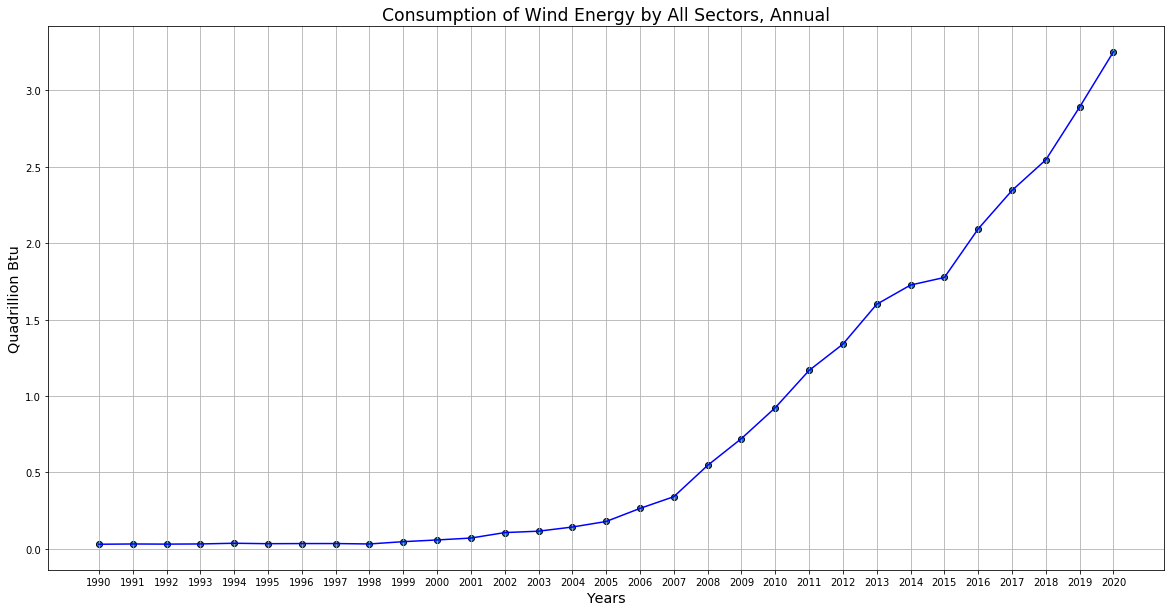

In [476]:
# Electric Power Sector Wind Net Summer Capacity, Annual
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(years, wind, edgecolors="black")
plt.plot(years,wind, color = "blue")
plt.title("Consumption of Wind Energy by All Sectors, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/Wind Cosumption.png")

# Display the figure
plt.show()

In [477]:
renewable_urls = []
renewable_consumption_btu = []
renewable_years = []
i = 0

renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVTCBUS.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GETCBUS.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOTCBUS.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNTCBUS.A")

for renewables in renewable_urls:
    renewable_response = requests.get(renewables).json()
    renewable_consumption_btu.append([])
    renewable_years.append([])
    for response in renewable_response["series"][0]["data"]:
        renewable_years[i].append(response[0])
    renewable_consumption_btu[i] = renewable_consumption_btu[i][::-1]
    renewable_years[i] = renewable_years[i][::-1]
    i += 1

In [515]:
# Initializing a line for Renewable Energy Graph
# x_lim = 1 * np.pi
# x_axis = np.arange(0, x_lim, 2.0)
# sin = np.sin(x_axis)

total_consumption_renewables.sum()
print(f"Among these four renewable types of energy, the US has consumed approximately {int(total_consumption_renewables.sum())} quadrillion btu within the last 30 years alone.")

Among these four renewable types of energy, the US has consumed approximately 124 quadrillion btu within the last 30 years alone.


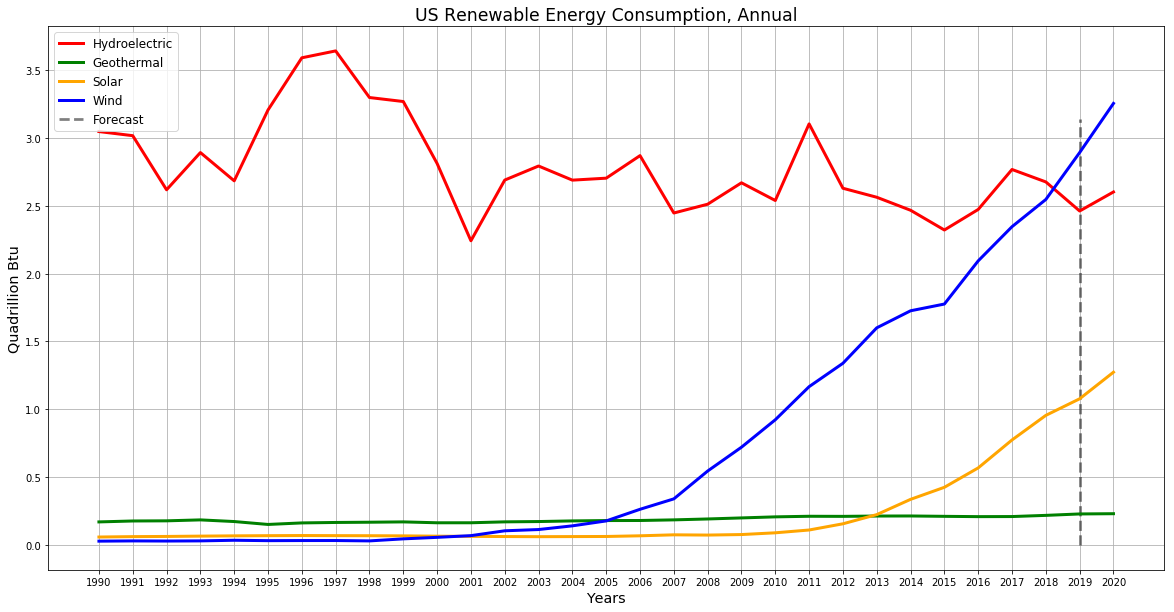

In [502]:
# US Renewable Energy Consumption
plt.figure(figsize=(20,10))

# # Create a visual for the combined data
plt.plot(years, hydroelectric, label="Hydroelectric", color="red", linewidth=3.0)
plt.plot(years, geothermal, label="Geothermal", color ="green", linewidth=3.0)
plt.plot(years, solar, label="Solar", color="orange", linewidth=3.0)
plt.plot(years, wind, label="Wind", color="blue", linewidth=3.0)
plt.title("US Renewable Energy Consumption, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.legend(loc='best', frameon=True, fancybox=True, fontsize="x-large")
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.grid(True)

# Save Figure
plt.savefig("output/Renewable Energy Consumption_Line.png")

# Create a forecast line
plt.vlines(29, 0, x_lim, alpha=0.5, label="Forecast", linestyles="--", linewidth=2.75)
plt.legend()


# Display the figure
plt.show()


In [480]:
# Create Renewable Consumption DataFrame using list of dictionaries method
renewable_consumption_btu_df = pd.DataFrame({
    'Year': years,
    'Hydroelectric': hydroelectric,
    'Wind': wind,
    'Solar': solar,
    'Geothermal': geothermal,
})
# Show DataFrame
# renewable_consumption_btu_df.set_index("Year")
renewable_consumption_btu_df.head()

,Year,Hydroelectric,Wind,Solar,Geothermal
0,1990,3.046391,0.029007,0.059420,0.170747
1,1991,3.015943,0.030796,0.062354,0.177626
2,1992,2.617436,0.029863,0.063676,0.178699
3,1993,2.891613,0.030987,0.066060,0.185673
4,1994,2.683457,0.035560,0.068102,0.173464


In [483]:
# Find minimum and maximum emissions for petroleum and other liquid fuels
min_emissions_value = petroleum_consumption["Hydroelectric"].min()
min_emissions_year = int(pt_emissions_df[pt_emissions_df["Petroleum Emissions"]==min_emissions_value].Year)
max_emissions_value = pt_emissions_df["Petroleum Emissions"].max()
max_emissions_year = int(pt_emissions_df[pt_emissions_df["Petroleum Emissions"]==max_emissions_value].Year)

# find the total petroleum and other liquid fuels emissions
# total_emissions = pt_emissions_df["Petroleum Emissions"].sum()

# find the difference between most and least petroleum emissions
emissions_change = (max_emissions_value - min_emissions_value)

#find the percentage change from lowest year to highest year
emissions_percent_change = (emissions_change / min_emissions_value) *100

# print(f"{int(min_emissions_year)} had the least amount of emissions from petroleum and other liquid fuels with {min_emissions_value} million meric tons.")
# print(f"{int(max_emissions_year)} has the most amount of emissions from petroleum and other liquid fuels with {max_emissions_value} million meric tons.")
# print(f"The total emissions from petroleum and other liquid fuels is {total_emissions} million metric tons.")
# print(f"The difference in petroleum emissions from 1990 and 2020 is {emissions_change} million metric tons.")
# print(f"The percentage change in petroleum emissions from the lowest year to highest year is {emissions_percent_change}%")

NameError: name 'petroleum_consumption' is not defined

In [484]:
#  Export file as a CSV, without the Pandas index, but with the header
renewable_consumption_btu_df.to_csv("resources/USRenewableConsumption.csv", index=False, header=True)

In [485]:
# Display years on chart to be displayed
renewable_consumption_btu_df = renewable_consumption_btu_df.set_index("Year")

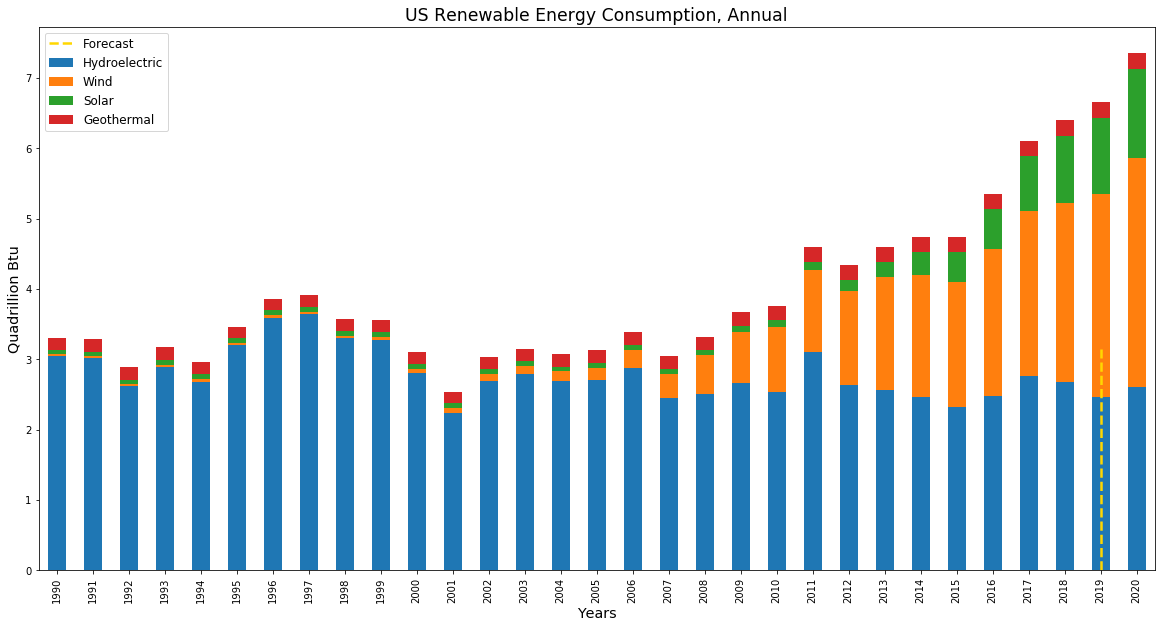

In [507]:
# renewable_consumption_df = renewable_consumption_df.set_index('renewable_years')

# Initialize variable for bar graph of consumption data
ax = renewable_consumption_btu_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'US Renewable Energy Consumption')

# Prepare and Create Stacked Bar Graph
ax.set_title("US Renewable Energy Consumption, Annual", fontsize="xx-large")
ax.set_ylabel("Quadrillion Btu", fontsize="x-large")
ax.set_xlabel("Years", fontsize="x-large")
# ax.figtext(x, y, z, *args, **kwargs)
ax.legend(loc='upper left', frameon=True, fancybox=True, fontsize="x-large")
plt.vlines(29, 0, x_lim, alpha=1.0, linestyles="--", label="Forecast", linewidth=2.5, color="gold")
plt.legend()
ax.grid
ax

# Save Figure
plt.savefig("output/Renewable Energy Consumption_StackedBar.png")

# Display the figure
plt.show()

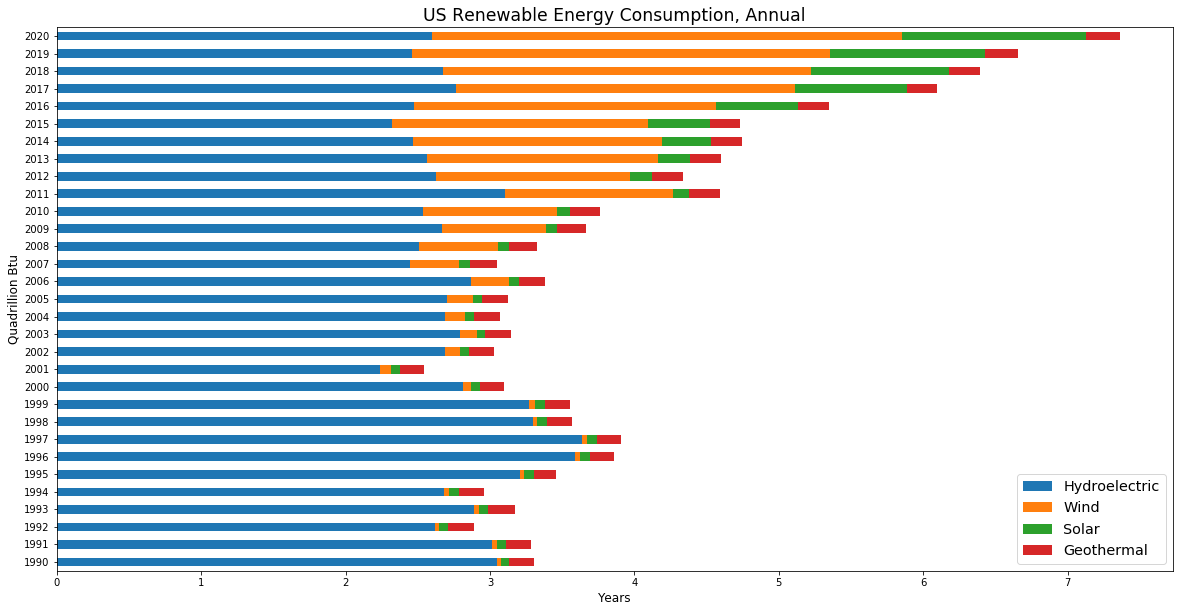

In [487]:
# Initialize variable for horizontal graph of consumption data
axh = renewable_consumption_btu_df.plot(kind='barh', stacked=True, figsize=(20,10), title = 'US Renewable Energy Consumption')

axh.set_title("US Renewable Energy Consumption, Annual", fontsize="xx-large")
axh.set_ylabel("Quadrillion Btu", fontsize="large")
axh.set_xlabel("Years", fontsize="large")
axh.legend(loc='lower right', frameon=True, fancybox=True, fontsize="x-large")
axh.grid
axh

# for rowNum,row in renewable_consumption_df.iterrows():
#     xpos = 0
#     for val in row:
#         xpos += val
#         ax.text(xpos + 1, rowNum-0.05, str(val), color='black')
#     xpos = 0
# ax

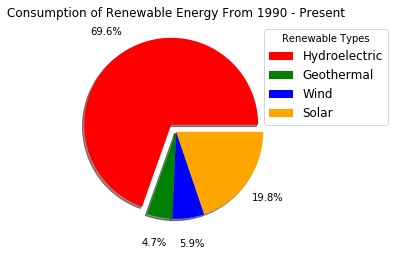

In [508]:
# Get total emissions by type
total_consumption_renewables = (hydroelectric_total_consumption + geothermal_total_consumption + solar_total_consumption + wind_total_consumption)

# Build Pie Chart
sizes = [((hydroelectric_total_consumption / total_consumption_renewables) * 100) , ((geothermal_total_consumption / total_consumption_renewables) * 100) , ((solar_total_consumption / total_consumption_renewables) * 100), ((wind_total_consumption/total_consumption_renewables) * 100)]
labels = ["Hydroelectric", "Geothermal", "Wind", "Solar"]
colors = ["red" , "green" , "blue", "orange"]
explode = [0.1,0,0,0]

plt.pie(sizes, explode =explode, colors = colors , shadow = True , autopct="%1.1f%%", pctdistance=1.3)
plt.title('Consumption of Renewable Energy From 1990 - Present')
plt.legend(labels,
          title="Renewable Types",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Save Figure
plt.savefig("output/RenewableConsumption_pie.png")

# Display the figure
plt.show()

In [489]:
# determine year to year percentage change for energy production both fossil fuels and renewables to see if the pace of energy production has changed for either. 
# look at how energy production affects prices. 
# *Bonus: Analyze total U.S. population over the same period of time.
# Compare all of our findings together. 

In [509]:
# US Consumption Data
fossilfuel_consumption = "Resources/FossilFuelConsumption.csv"
renewable_consumption = "Resources/USRenewableConsumption.csv"
fossilfuel_consumption_df = pd.read_csv(fossilfuel_consumption)
renewable_consumption_df = pd.read_csv(renewable_consumption)
renewable_consumption_df.head()

,Year,Hydroelectric,Wind,Solar,Geothermal
0,1990,3.046391,0.029007,0.059420,0.170747
1,1991,3.015943,0.030796,0.062354,0.177626
2,1992,2.617436,0.029863,0.063676,0.178699
3,1993,2.891613,0.030987,0.066060,0.185673
4,1994,2.683457,0.035560,0.068102,0.173464


In [510]:
USconsumption_combined_df=pd.merge(fossilfuel_consumption_df, renewable_consumption_df, on="Year")
USconsumption_combined_df.head()

,Year,Petroleum (mmbpd),Natural Gas (bcf/day),Coal (MMSt),Hydroelectric,Wind,Solar,Geothermal
0,1990,16.989137,52.530288,902.768744,3.046391,0.029007,0.059420,0.170747
1,1991,16.713847,53.594703,895.303788,3.015943,0.030796,0.062354,0.177626
2,1992,17.032224,55.268382,908.113844,2.617436,0.029863,0.063676,0.178699
3,1993,17.236999,56.958472,939.165111,2.891613,0.030987,0.066060,0.185673
4,1994,17.718979,58.211229,955.626226,2.683457,0.035560,0.068102,0.173464


In [511]:
#  Export file as a CSV, without the Pandas index, but with the header
USconsumption_combined_df.to_csv("resources/USconsumption_combined.csv", index=False, header=True)